## This notebook analyzes the US airline data for 2014 from Bureau of Transportation Statistics in monthly files. 
### It also demos how to deal with large files in python.
### - Notebook cleanup pending.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 0)
import os
import glob
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%ls

In [2]:
m1 = pd.read_csv('./Monthly Data/1.csv', parse_dates = ['FL_DATE'],infer_datetime_format=True)

In [ ]:
m1.head()

In [ ]:
m1.columns

In [3]:
#m1.dtypes
m1.dtypes.values
del m1['Unnamed: 50']

In [4]:
m1.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Data columns (total 50 columns):
FL_DATE                  471949 non-null datetime64[ns]
UNIQUE_CARRIER           471949 non-null object
AIRLINE_ID               471949 non-null int64
CARRIER                  471949 non-null object
TAIL_NUM                 467903 non-null object
FL_NUM                   471949 non-null int64
ORIGIN_AIRPORT_ID        471949 non-null int64
ORIGIN_AIRPORT_SEQ_ID    471949 non-null int64
ORIGIN_CITY_MARKET_ID    471949 non-null int64
ORIGIN                   471949 non-null object
ORIGIN_CITY_NAME         471949 non-null object
ORIGIN_STATE_ABR         471949 non-null object
ORIGIN_STATE_FIPS        471949 non-null int64
ORIGIN_STATE_NM          471949 non-null object
ORIGIN_WAC               471949 non-null int64
DEST_AIRPORT_ID          471949 non-null int64
DEST_AIRPORT_SEQ_ID      471949 non-null int64
DEST_CITY_MARKET_ID      471949 non-null int64
DEST                     47

In [ ]:
m1_int = m1.select_dtypes(include=['int64'])
converted_int_unsigned = m1_int.apply(pd.to_numeric,downcast='unsigned')
converted_int = m1_int.apply(pd.to_numeric,downcast='integer')

In [ ]:
converted_int_unsigned.head()

In [ ]:
print(converted_int_unsigned.dtypes)
print()
print(converted_int.dtypes)
print()
print(converted_int_unsigned.info(memory_usage = 'deep'))
print(converted_int.info(memory_usage = 'deep'))

In [6]:
m1_float = m1.select_dtypes(include=['float64'])
print(m1_float.shape)
converted_float = m1_float.apply(pd.to_numeric,downcast='float')

(471949, 21)


In [100]:
print(converted_float.shape)
print(mem_usage(m1_float))
print(mem_usage(converted_float))
#print(mem_usage(year_data))

(471949, 21)
75.61 MB
37.81 MB
6200.52 MB


In [7]:
m1_object = m1.select_dtypes(include=['object'])
print(m1_object.shape)
#print(m1_object.dtypes)
converted_object = m1_object.astype('category')

(471949, 13)


In [106]:
print(m1_object.shape)
print(mem_usage(m1_object))
print(mem_usage(converted_object))
print(converted_object.shape)

(471949, 13)
369.54 MB
8.66 MB
(471949, 13)


In [ ]:
converted_object.head()

In [8]:
optimized_m1 = m1.copy()
optimized_m1[converted_int.columns] = converted_int
optimized_m1[converted_float.columns] = converted_float
optimized_m1[converted_object.columns] = converted_object

In [ ]:
optimized_m1.head()
optimized_m1.shape
print(optimized_m1.dtypes)
mem_usage(optimized_m1)

In [ ]:
for i in dtypes.values:
    print(i)
    print(i.name)
    print()

In [ ]:
dtypes = optimized_m1.drop('FL_DATE',axis=1).dtypes
print(dtypes)
print(dtypes.index)
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
print(dtypes_type)
column_types = dict(zip(dtypes_col, dtypes_type))
column_types

In [ ]:
# for i in m1.dtypes.values:
#     print(i.name)
int_cols =m1.select_dtypes(include =['int64']).columns.tolist()
float_cols = m1.select_dtypes(include =['float']).columns.tolist()
print(int_cols)
len(int_cols)
print(float_cols)
len(float_cols)

In [175]:
m1[int_cols] = m1[int_cols].apply(pd.to_numeric,downcast='integer')

In [180]:
m1[float_cols] = m1[float_cols].apply(pd.to_numeric,downcast='float')

In [182]:
obj_cols = m1.select_dtypes(include =['object']).columns.tolist()
print(obj_cols)
print(len(obj_cols))

['UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_TIME_BLK', 'ARR_TIME_BLK']
13


In [183]:
m1[obj_cols] = m1[obj_cols].astype('category')

In [ ]:
m1.dtypes
#print(mem_usage(m1))

In [127]:
m2 = pd.read_csv('./Monthly Data/2.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)

In [ ]:
print(mem_usage(m2))
print(m2.shape)
print(m2.dtypes)
m2.head()

In [19]:
airports = pd.read_csv('./Lookup Tables/L_AIRPORT_ID.csv')
carrier_hist = pd.read_csv('./Lookup Tables/L_CARRIER_HISTORY.csv')

In [ ]:
airports.head()

In [205]:
print(mem_usage(airports))
print(mem_usage(carrier_hist))

0.61 MB
0.26 MB


In [ ]:
carrier_hist.head()

In [135]:
m1 = pd.read_csv('./Monthly Data/1.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m2 = pd.read_csv('./Monthly Data/2.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m3 = pd.read_csv('./Monthly Data/3.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m4 = pd.read_csv('./Monthly Data/4.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m5 = pd.read_csv('./Monthly Data/5.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m6 = pd.read_csv('./Monthly Data/6.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m7 = pd.read_csv('./Monthly Data/7.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m8 = pd.read_csv('./Monthly Data/8.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m9 = pd.read_csv('./Monthly Data/9.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m10 = pd.read_csv('./Monthly Data/10.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m11= pd.read_csv('./Monthly Data/11.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)
m12 = pd.read_csv('./Monthly Data/12.csv',dtype = column_types, parse_dates = ['FL_DATE'],infer_datetime_format=True)

In [187]:
del year_data

In [2]:
path = './Monthly Data/'
monthly_files = glob.glob(os.path.join(path, '*.csv'))
print(monthly_files)
my_order = [0,4,5,6,7,8,9,10,11,1,2,3]
monthly_files = [monthly_files[i] for i in my_order]
print(monthly_files)
year_data = pd.concat((pd.read_csv(f, parse_dates = ['FL_DATE'],infer_datetime_format=True) for f in monthly_files), ignore_index= True)

['./Monthly Data\\1.csv', './Monthly Data\\10.csv', './Monthly Data\\11.csv', './Monthly Data\\12.csv', './Monthly Data\\2.csv', './Monthly Data\\3.csv', './Monthly Data\\4.csv', './Monthly Data\\5.csv', './Monthly Data\\6.csv', './Monthly Data\\7.csv', './Monthly Data\\8.csv', './Monthly Data\\9.csv']
['./Monthly Data\\1.csv', './Monthly Data\\2.csv', './Monthly Data\\3.csv', './Monthly Data\\4.csv', './Monthly Data\\5.csv', './Monthly Data\\6.csv', './Monthly Data\\7.csv', './Monthly Data\\8.csv', './Monthly Data\\9.csv', './Monthly Data\\10.csv', './Monthly Data\\11.csv', './Monthly Data\\12.csv']


In [ ]:
print(year_data.shape)
print(year_data.dtypes)
print(mem_usage(year_data))

In [ ]:
int_cols =year_data.select_dtypes(include =['int64']).columns.tolist()
float_cols = year_data.select_dtypes(include =['float']).columns.tolist()
obj_cols = year_data.select_dtypes(include =['object']).columns.tolist()
print(int_cols)
len(int_cols)
print(float_cols)
len(float_cols)
print(obj_cols)
print(len(obj_cols))

In [5]:
year_data[int_cols] = year_data[int_cols].apply(pd.to_numeric,downcast='integer')

In [6]:
year_data[float_cols] = year_data[float_cols].apply(pd.to_numeric,downcast='float')

In [7]:
year_data[obj_cols] = year_data[obj_cols].astype('category')

In [9]:
print(year_data.shape)
print(year_data.dtypes)
#print(mem_usage(year_data))
#year_data['Unnamed: 50'].head()
del year_data['Unnamed: 50']
print(year_data.columns)

(5819811, 51)
FL_DATE                  datetime64[ns]
UNIQUE_CARRIER                 category
AIRLINE_ID                        int16
CARRIER                        category
TAIL_NUM                       category
FL_NUM                            int16
ORIGIN_AIRPORT_ID                 int16
ORIGIN_AIRPORT_SEQ_ID             int32
ORIGIN_CITY_MARKET_ID             int32
ORIGIN                         category
ORIGIN_CITY_NAME               category
ORIGIN_STATE_ABR               category
ORIGIN_STATE_FIPS                  int8
ORIGIN_STATE_NM                category
ORIGIN_WAC                         int8
DEST_AIRPORT_ID                   int16
DEST_AIRPORT_SEQ_ID               int32
DEST_CITY_MARKET_ID               int32
DEST                           category
DEST_CITY_NAME                 category
DEST_STATE_ABR                 category
DEST_STATE_FIPS                    int8
DEST_STATE_NM                  category
DEST_WAC                           int8
CRS_DEP_TIME              

In [ ]:
year_data.info(memory_usage = 'deep')

In [4]:
year_data['FL_DATE'] = pd.to_datetime(year_data['FL_DATE'])

(5819811, 50)


In [6]:
print("Number of rows in the data:",year_data.shape[0])

Number of rows in the data: 5819811


In [ ]:
year_data.head()

In [ ]:
year_data['UNIQUE_CARRIER'].drop_duplicates()

In [32]:
#year_data.to_csv(index = False)

In [ ]:
year_data.dtypes

In [ ]:
year_data.info(memory_usage='deep')

In [11]:
for dtype in ['float64','int64','object']:
    selected_dtype = year_data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float64 columns: 42.38 MB
Average memory usage for int64 columns: 41.63 MB
Average memory usage for object columns: 325.55 MB


In [16]:
print(year_data.CARRIER.nunique())
print(year_data.ARR_TIME_BLK.nunique())
print(year_data.DEST_CITY_NAME.nunique())

14
19
320


In [23]:
year_data.select_dtypes(include =['object']).columns

Index(['UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_TIME_BLK', 'ARR_TIME_BLK'],
      dtype='object')

In [48]:
for col in year_data.select_dtypes(include =['object']).columns:

    num_unique_values = len(year_data[col].unique())
    num_total_values = len(year_data[col])
    print(col)
    #print(col.dtypes)
    print('Num unique values: ',num_unique_values)
    print('Num total values: ',num_total_values)
    print()
#     if num_unique_values / num_total_values < 0.5:
#         converted_obj.loc[:,col] = gl_obj[col].astype('category')
#     else:
#         converted_obj.loc[:,col] = gl_obj[col]

UNIQUE_CARRIER
Num unique values:  14
Num total values:  5819811

CARRIER
Num unique values:  14
Num total values:  5819811

TAIL_NUM
Num unique values:  4759
Num total values:  5819811

ORIGIN
Num unique values:  325
Num total values:  5819811

ORIGIN_CITY_NAME
Num unique values:  321
Num total values:  5819811

ORIGIN_STATE_ABR
Num unique values:  53
Num total values:  5819811

ORIGIN_STATE_NM
Num unique values:  53
Num total values:  5819811

DEST
Num unique values:  324
Num total values:  5819811

DEST_CITY_NAME
Num unique values:  320
Num total values:  5819811

DEST_STATE_ABR
Num unique values:  53
Num total values:  5819811

DEST_STATE_NM
Num unique values:  53
Num total values:  5819811

DEP_TIME_BLK
Num unique values:  19
Num total values:  5819811

ARR_TIME_BLK
Num unique values:  19
Num total values:  5819811



In [46]:
year_data.dtypes.iloc[5].dtype

dtype('int64')

In [ ]:
# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!

def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

gl_int = gl.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(gl_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

In [ ]:
x =year_data.dtypes.AIRLINE_ID
x = year_data.AIRLINE_ID.dtypes
print(x)
for i in year_data.columns:
     year_data.i.head()

In [ ]:
m2.head()

In [15]:
print(m1.shape)
print(m2.shape)
print(m12.shape)

(471949, 51)
(430602, 51)
(477183, 51)


In [ ]:
m2.sample(10)

In [51]:
t1 = m1['CANCELLED'] == 1.0
t2 = m1['DEP_TIME'].notna()
t3 = t1 & t2

In [ ]:
t3 = m1['CANCELLED'] == 1.0.values & m1['DEP_TIME'].notna()

In [ ]:
print(m1[t3].shape)
m1[t3]

In [ ]:
m1['DEP_TIME'].notna()

In [ ]:
m1['CANCELLED'] == 1.0

In [137]:
months = [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]
year_data = pd.concat(months, ignore_index = True)

In [ ]:
# year_data.shape

In [ ]:
#year_data.sample(10)
year_data.head()

In [ ]:
#m1.merge(airports, on = )

In [64]:
airports.shape
airports.sample(5)

,Code,Description
2341,12436,"Inyokern, CA: Inyokern Airport"
4132,14301,"Puerto Asis, Colombia: Puerto Asis Airport"
4124,14293,"Punta Cana, Dominican Republic: Punta Cana Int..."
394,10418,"Auburn, CA: Auburn Municipal"
3928,14094,"Parnaiba, Brazil: Parnaiba Airport"


In [83]:
print(airports.shape)
print(airports['Code'].nunique())
print(year_data['ORIGIN_AIRPORT_ID'].nunique())
print(year_data['ORIGIN_AIRPORT_SEQ_ID'].nunique())
print(year_data['ORIGIN_CITY_MARKET_ID'].nunique())
print(carrier_hist.shape)
print(carrier_hist['Code'].nunique())

(6361, 2)
6361
325
338
325
304
(1846, 2)
1676


In [84]:
print(year_data['DEST_AIRPORT_ID'].nunique())
print(year_data['DEST_AIRPORT_SEQ_ID'].nunique())
print(year_data['DEST_CITY_MARKET_ID'].nunique())

324
337
303


In [ ]:
year_data.dtypes

In [13]:
cancelled = year_data['CANCELLED'] == 1.0

In [209]:
year_data['CANCELLED'].isna().astype(int).sum()
year_data['DIVERTED'].isna().astype(int).sum()

0

In [14]:
dep_time_null = year_data['DEP_TIME'].isna()

In [15]:
arr_time_null = year_data['ARR_TIME'].isna()
diverted = year_data['DIVERTED'] == 1.0

In [ ]:
~cancelled

In [215]:
year_data[['DIVERTED']].groupby('DIVERTED').size()

DIVERTED
0.0    5805362
1.0      14449
dtype: int64

In [32]:
print('Dep time null:',(year_data['DEP_TIME'].isna().values*1).sum())
print('Cancelled flights:', ((year_data['CANCELLED'] ==1.0).values*1).sum())
print('Arr time null:',(year_data['ARR_TIME'].isna().values*1).sum())
print('Diverted flights:',((year_data['DIVERTED'] ==1.0).values*1).sum())

Dep time null: 122742
Cancelled flights: 126984
Arr time null: 129628
Diverted flights: 14449


In [50]:
print(year_data.groupby('DIVERTED').size())
print(year_data.groupby('CANCELLED').size())
print(year_data['DEP_TIME'].isna().astype(int).sum())

DIVERTED
0.0    5805362
1.0      14449
dtype: int64
CANCELLED
0.0    5692827
1.0     126984
dtype: int64
122742


In [ ]:
year_data[year_data['DIVERTED'] == 1.0][[]]

In [217]:
year_data.shape

(5819811, 50)

In [16]:
not_cancelled = year_data['CANCELLED'] == 0.0
not_diverted = year_data['DIVERTED'] == 0.0
dep_time_not_null = year_data['DEP_TIME'].notna()
arr_time_not_null = year_data['ARR_TIME'].notna()

In [207]:
print(year_data[dep_time_null & arr_time_not_null].shape)
print(year_data[dep_time_not_null & arr_time_null].shape)

NameError: name 'dep_time_null' is not defined

In [61]:
year_data[dep_time_not_null & arr_time_null].head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
188,2014-01-01,EV,20366,EV,N14168,3854,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,12206,1220603,32206,HRL,"Harlingen/San Benito, TX",TX,48,Texas,74,2058,2107.0,9.0,9.0,0.0,0.0,2000-2059,NaN,NaN,NaN,NaN,2208,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,0.0,70.0,NaN,NaN,1.0,295.0,2
596,2014-01-01,EV,20366,EV,N16525,4654,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,12206,1220603,32206,HRL,"Harlingen/San Benito, TX",TX,48,Texas,74,1109,1104.0,-5.0,0.0,0.0,-1.0,1100-1159,8.0,1112.0,NaN,NaN,1217,NaN,NaN,NaN,NaN,NaN,1200-1259,0.0,1.0,68.0,NaN,NaN,1.0,295.0,2
622,2014-01-01,EV,20366,EV,N12530,4593,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,12206,1220603,32206,HRL,"Harlingen/San Benito, TX",TX,48,Texas,74,857,945.0,48.0,48.0,1.0,3.0,0800-0859,6.0,951.0,NaN,NaN,1007,NaN,NaN,NaN,NaN,NaN,1000-1059,0.0,1.0,70.0,NaN,NaN,1.0,295.0,2
678,2014-01-01,EV,20366,EV,N14947,4544,13244,1324402,33244,MEM,"Memphis, TN",TN,47,Tennessee,54,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,1455,1521.0,26.0,26.0,1.0,1.0,1400-1459,6.0,1527.0,NaN,NaN,1641,NaN,NaN,NaN,NaN,NaN,1600-1659,1.0,0.0,106.0,NaN,NaN,1.0,468.0,2
1406,2014-01-01,EV,20366,EV,N27200,6155,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,12389,1238902,32389,ISN,"Williston, ND",ND,38,North Dakota,66,1935,2215.0,160.0,160.0,1.0,10.0,1900-1959,NaN,NaN,NaN,NaN,2220,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,0.0,105.0,NaN,NaN,1.0,576.0,3


## What is the 1st and 15th most flown route? 
### Also how do we define a route?

In [218]:
(not_cancelled & dep_time_not_null & arr_time_not_null & not_diverted).astype(int).sum()

5678378

In [219]:
(cancelled | dep_time_null | arr_time_null | diverted).astype(int).sum()

141433

In [220]:
year_data_1 = year_data[not_cancelled & dep_time_not_null & arr_time_not_null & not_diverted]

In [221]:
year_data_1.shape

(5678378, 50)

In [222]:
#del year_data_1
mem_usage(year_data_1)

'818.30 MB'

In [151]:
route_seq = year_data_1.groupby(['ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID']).\
size().reset_index(name = 'count').\
sort_values('count', ascending = False).reset_index()[:30]
route_seq

,index,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,count
0,4485,1477101,1289203,12973
1,2706,1289203,1477101,12958
2,2466,1247802,1289203,12391
3,2670,1289203,1247802,12344
4,2585,1288903,1289203,11658
5,2672,1289203,1288903,11357
6,2492,1247802,1477101,8790
7,4482,1477101,1247802,8783
8,3929,1410702,1289203,8738
9,2694,1289203,1410702,8708


In [126]:
origin_airports_seqid = year_data_1[['ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_NAME']].drop_duplicates().\
rename(columns = {'ORIGIN_AIRPORT_SEQ_ID':'AIRPORT_SEQ_ID','ORIGIN_CITY_NAME': 'CITY_NAME' })
#origin_airports_seqid
dest_airports_seqid = year_data_1[['DEST_AIRPORT_SEQ_ID','DEST_CITY_NAME']].drop_duplicates()\
.rename(columns = {'DEST_AIRPORT_SEQ_ID':'AIRPORT_SEQ_ID','DEST_CITY_NAME': 'CITY_NAME' })
airport_seqid = (pd.concat([origin_airports_seqid,dest_airports_seqid], sort = False, ignore_index = True)).drop_duplicates()
airport_seqid.head()

,AIRPORT_SEQ_ID,CITY_NAME
0,1227802,"Wichita, KS"
1,1330303,"Miami, FL"
2,1114603,"Charleston/Dunbar, WV"
3,1129803,"Dallas/Fort Worth, TX"
4,1027903,"Amarillo, TX"


In [148]:
origin_seqid = year_data_1[['ORIGIN_AIRPORT_SEQ_ID','ORIGIN']].drop_duplicates().\
rename(columns = {'ORIGIN_AIRPORT_SEQ_ID':'AIRPORT_SEQ_ID', 'ORIGIN': 'AIRPORT'})
#origin_seqid
dest_seqid = year_data_1[['DEST_AIRPORT_SEQ_ID','DEST']].drop_duplicates()\
.rename(columns = {'DEST_AIRPORT_SEQ_ID':'AIRPORT_SEQ_ID', 'DEST': 'AIRPORT'})
airportID_seqid = (pd.concat([origin_seqid,dest_seqid], sort = False, ignore_index = True)).drop_duplicates()
airportID_seqid.head()

,AIRPORT_SEQ_ID,AIRPORT
0,1227802,ICT
1,1330303,MIA
2,1114603,CRW
3,1129803,DFW
4,1027903,AMA


In [129]:
print(dest_airports_seqid.shape)
print(origin_airports_seqid.shape)
#airports_seqid = year_data_1[['ORIGIN_AIRPORT_SEQ_ID','ORIGIN_CITY_NAME']].drop_duplicates()

(337, 2)
(338, 2)


In [152]:
airport_seqid.shape
route_seq.merge(airport_seqid, how = 'left', left_on = 'ORIGIN_AIRPORT_SEQ_ID', right_on = 'AIRPORT_SEQ_ID')\
.merge(airport_seqid, how = 'left', left_on='DEST_AIRPORT_SEQ_ID', right_on = 'AIRPORT_SEQ_ID')

,index,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,count,AIRPORT_SEQ_ID_x,CITY_NAME_x,AIRPORT_SEQ_ID_y,CITY_NAME_y
0,4485,1477101,1289203,12973,1477101,"San Francisco, CA",1289203,"Los Angeles, CA"
1,2706,1289203,1477101,12958,1289203,"Los Angeles, CA",1477101,"San Francisco, CA"
2,2466,1247802,1289203,12391,1247802,"New York, NY",1289203,"Los Angeles, CA"
3,2670,1289203,1247802,12344,1289203,"Los Angeles, CA",1247802,"New York, NY"
4,2585,1288903,1289203,11658,1288903,"Las Vegas, NV",1289203,"Los Angeles, CA"
5,2672,1289203,1288903,11357,1289203,"Los Angeles, CA",1288903,"Las Vegas, NV"
6,2492,1247802,1477101,8790,1247802,"New York, NY",1477101,"San Francisco, CA"
7,4482,1477101,1247802,8783,1477101,"San Francisco, CA",1247802,"New York, NY"
8,3929,1410702,1289203,8738,1410702,"Phoenix, AZ",1289203,"Los Angeles, CA"
9,2694,1289203,1410702,8708,1289203,"Los Angeles, CA",1410702,"Phoenix, AZ"


In [153]:
airport_seqid.shape
route_seq.merge(airportID_seqid, how = 'left', left_on = 'ORIGIN_AIRPORT_SEQ_ID', right_on = 'AIRPORT_SEQ_ID')\
.merge(airportID_seqid, how = 'left', left_on='DEST_AIRPORT_SEQ_ID', right_on = 'AIRPORT_SEQ_ID')

,index,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,count,AIRPORT_SEQ_ID_x,AIRPORT_x,AIRPORT_SEQ_ID_y,AIRPORT_y
0,4485,1477101,1289203,12973,1477101,SFO,1289203,LAX
1,2706,1289203,1477101,12958,1289203,LAX,1477101,SFO
2,2466,1247802,1289203,12391,1247802,JFK,1289203,LAX
3,2670,1289203,1247802,12344,1289203,LAX,1247802,JFK
4,2585,1288903,1289203,11658,1288903,LAS,1289203,LAX
5,2672,1289203,1288903,11357,1289203,LAX,1288903,LAS
6,2492,1247802,1477101,8790,1247802,JFK,1477101,SFO
7,4482,1477101,1247802,8783,1477101,SFO,1247802,JFK
8,3929,1410702,1289203,8738,1410702,PHX,1289203,LAX
9,2694,1289203,1410702,8708,1289203,LAX,1410702,PHX


In [ ]:
year_data_1[['ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','ORIGIN_CITY_NAME','DEST_CITY_NAME']].\
groupby(['ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','ORIGIN_CITY_NAME','DEST_CITY_NAME'], as_index = False).size().\
reset_index(name = 'ABC').drop('ABC',1)

In [543]:
route_airport_id = year_data_1[['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID', 'ORIGIN']].groupby(['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID']).\
size().reset_index(name = 'Count').\
sort_values('Count', ascending = False).reset_index().drop('index',1)[:30]
route_airport_id
#to find round trip route, sum the airport ID

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,Count
0,14771,12892,12973
1,12892,14771,12958
2,12478,12892,12391
3,12892,12478,12344
4,12889,12892,11658
5,12892,12889,11357
6,12173,13830,9699
7,13830,12173,9634
8,12478,14771,8790
9,14771,12478,8783


In [544]:
origin_airport_map = year_data_1[['ORIGIN_AIRPORT_ID','ORIGIN']].drop_duplicates()
origin_airport_map.head(10)
route_airport = route_airport_id.merge(origin_airport_map, how = 'left', on = 'ORIGIN_AIRPORT_ID')\
.merge(origin_airport_map, how = 'left', left_on = 'DEST_AIRPORT_ID', right_on = 'ORIGIN_AIRPORT_ID')
route_airport 
route_airport['Route'] = route_airport['ORIGIN_x'].astype(str)+ '-' + route_airport['ORIGIN_y'].astype(str)
route_airport

,ORIGIN_AIRPORT_ID_x,DEST_AIRPORT_ID,Count,ORIGIN_x,ORIGIN_AIRPORT_ID_y,ORIGIN_y,Route
0,14771,12892,12973,SFO,12892,LAX,SFO-LAX
1,12892,14771,12958,LAX,14771,SFO,LAX-SFO
2,12478,12892,12391,JFK,12892,LAX,JFK-LAX
3,12892,12478,12344,LAX,12478,JFK,LAX-JFK
4,12889,12892,11658,LAS,12892,LAX,LAS-LAX
5,12892,12889,11357,LAX,12889,LAS,LAX-LAS
6,12173,13830,9699,HNL,13830,OGG,HNL-OGG
7,13830,12173,9634,OGG,12173,HNL,OGG-HNL
8,12478,14771,8790,JFK,14771,SFO,JFK-SFO
9,14771,12478,8783,SFO,12478,JFK,SFO-JFK


Text(0,0.5,'Route')

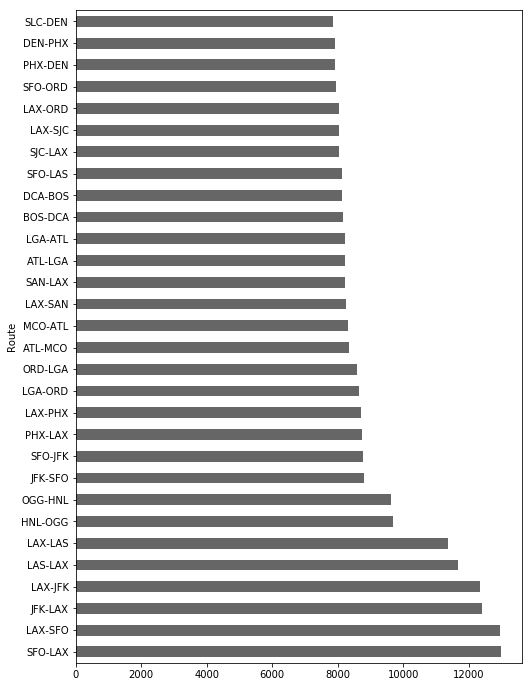

In [595]:
#plt.figure(figsize=(8,12))
route_airport.plot(kind = 'barh',x = 'Route', y = 'Count', legend = False, alpha = 0.6, color = 'k',figsize=(8,12)).set_ylabel('Route')

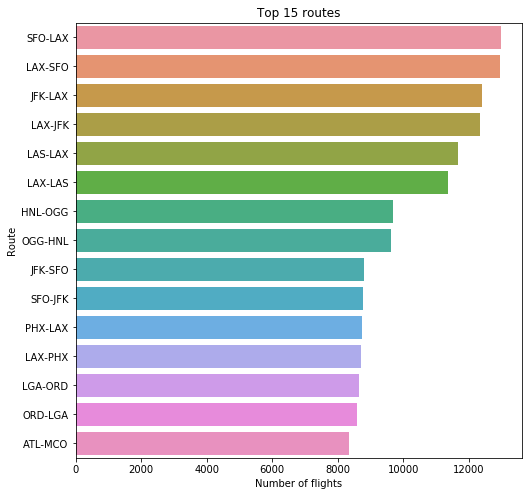

In [464]:
#sns.plot('carat', 'price', data=df, hue='color', fit_reg=False)
plt.figure(figsize=(8,8))
sns.barplot(y ='Route', x ='Count', data = route_airport).set(xlabel = 'Number of flights', title = 'Top 15 routes')
plt.savefig('Top_Routes.png')

In [224]:
route_airport_id.merge(airports, how = 'left', left_on = 'ORIGIN_AIRPORT_ID', right_on =  'Code')\
.merge(airports, how = 'left', left_on = 'DEST_AIRPORT_ID', right_on =  'Code')

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,count,Code_x,Description_x,Code_y,Description_y
0,14771,12892,12973,14771,"San Francisco, CA: San Francisco International",12892,"Los Angeles, CA: Los Angeles International"
1,12892,14771,12958,12892,"Los Angeles, CA: Los Angeles International",14771,"San Francisco, CA: San Francisco International"
2,12478,12892,12391,12478,"New York, NY: John F. Kennedy International",12892,"Los Angeles, CA: Los Angeles International"
3,12892,12478,12344,12892,"Los Angeles, CA: Los Angeles International",12478,"New York, NY: John F. Kennedy International"
4,12889,12892,11658,12889,"Las Vegas, NV: McCarran International",12892,"Los Angeles, CA: Los Angeles International"
5,12892,12889,11357,12892,"Los Angeles, CA: Los Angeles International",12889,"Las Vegas, NV: McCarran International"
6,12173,13830,9699,12173,"Honolulu, HI: Honolulu International",13830,"Kahului, HI: Kahului Airport"
7,13830,12173,9634,13830,"Kahului, HI: Kahului Airport",12173,"Honolulu, HI: Honolulu International"
8,12478,14771,8790,12478,"New York, NY: John F. Kennedy International",14771,"San Francisco, CA: San Francisco International"
9,14771,12478,8783,14771,"San Francisco, CA: San Francisco International",12478,"New York, NY: John F. Kennedy International"


In [309]:
route_market_id = year_data_1.groupby(['ORIGIN_CITY_MARKET_ID','DEST_CITY_MARKET_ID']).\
size().reset_index(name = 'Count').\
sort_values('Count', ascending = False).reset_index().drop('index',1)[:15]
route_market_id['Route'] = route_market_id['ORIGIN_CITY_MARKET_ID'].astype(str) + '-' + route_market_id['DEST_CITY_MARKET_ID'].astype(str)
route_market_id

,ORIGIN_CITY_MARKET_ID,DEST_CITY_MARKET_ID,Count,Route
0,32457,32575,53472,32457-32575
1,32575,32457,53424,32575-32457
2,31703,32467,25495,31703-32467
3,32467,31703,25439,32467-31703
4,30721,30852,21044,30721-30852
5,32211,32575,20821,32211-32575
6,30852,30721,20771,30852-30721
7,32575,32211,20514,32575-32211
8,30977,31703,19541,30977-31703
9,31703,30977,19521,31703-30977


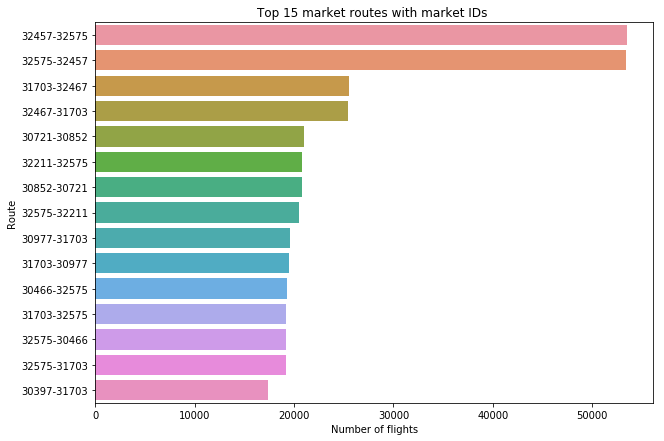

In [468]:
plt.figure(figsize=(10,7))
sns.barplot(y ='Route', x ='Count', data = route_market_id).set(xlabel = 'Number of flights', title = 'Top 15 market routes with market IDs ')
#plt.annotate('Atlanta to New York Market', xy=(5,5), xytext=(5,5))
plt.savefig('Top_Routes_marketID.png')

In [22]:
#year_data_1.head()
year_data_1.query('ORIGIN_CITY_MARKET_ID == 30397')[['ORIGIN_CITY_NAME','ORIGIN']].drop_duplicates()

NameError: name 'year_data_1' is not defined

In [25]:
m1.query('ORIGIN_CITY_MARKET_ID == 32467')[['ORIGIN_CITY_NAME','ORIGIN']].drop_duplicates()

,ORIGIN_CITY_NAME,ORIGIN
1,"Miami, FL",MIA
1496,"Fort Lauderdale, FL",FLL


In [537]:
year_data_1.query('ORIGIN_CITY_MARKET_ID == 31703')[['ORIGIN_CITY_NAME','ORIGIN']].drop_duplicates()

,ORIGIN_CITY_NAME,ORIGIN
46,"White Plains, NY",HPN
108,"Newark, NJ",EWR
150,"New York, NY",LGA
2010,"New York, NY",JFK
4752,"Newburgh/Poughkeepsie, NY",SWF
13475,"Islip, NY",ISP


In [542]:
city_marketid = year_data_1[['ORIGIN_CITY_MARKET_ID','ORIGIN_CITY_NAME','ORIGIN']].drop_duplicates().reset_index(drop = True)\
.rename(columns = {'ORIGIN_CITY_MARKET_ID': 'MARKET_ID','ORIGIN_CITY_NAME': 'CITY_NAME'}).sort_values(by = 'MARKET_ID')
city_marketid.sample(5)
city_marketid.head(5)
city_marketid.to_csv('MarketID_to_Cities.csv')

In [538]:
city_marketid.groupby('MARKET_ID', as_index = False).count().sort_values(by = 'CITY_NAME', ascending = False)

,MARKET_ID,CITY_NAME,ORIGIN
129,31703,6,6
182,32575,5,5
67,30852,3,3
174,32457,3,3
56,30721,3,3
228,33667,2,2
175,32467,2,2
108,31453,2,2
74,30977,2,2
51,30647,2,2


In [ ]:
city_marketid.groupby('MARKET_ID', axis = 1).count()

In [ ]:
#Need grouping of market IDs
route_market_id.merge(city_marketid, how = 'left', left_on = 'ORIGIN_CITY_MARKET_ID', right_on =  'MARKET_ID')\
.merge(city_marketid, how = 'left', left_on = 'DEST_CITY_MARKET_ID', right_on =  'MARKET_ID')[:50]

## What carriers have flown the most number of flights? How many? 

In [17]:
year_data_2 = year_data[not_cancelled & dep_time_not_null & arr_time_not_null][['UNIQUE_CARRIER','AIRLINE_ID','CARRIER']]

In [551]:
mem_usage(year_data_2)

'65.12 MB'

In [558]:
#Is Unique carrier vs Carrier
print((year_data_2['UNIQUE_CARRIER'] != year_data_2['CARRIER']).values.astype(int).sum())
print(year_data_2['UNIQUE_CARRIER'].value_counts())
print(year_data_2['CARRIER'].drop_duplicates())
print(year_data_2['AIRLINE_ID'].drop_duplicates())

0
WN    1158935
DL     793793
EV     651537
OO     594153
AA     529093
UA     486028
US     407774
MQ     371335
B6     243472
AS     159261
F9      85107
FL      77953
HA      74569
VX      57173
Name: UNIQUE_CARRIER, dtype: int64
0        AA
3        EV
1426     F9
1629     FL
1963     HA
2116     MQ
4288     AS
4707     B6
5471     DL
7226     OO
8836     UA
9399     US
11372    VX
11540    WN
Name: CARRIER, dtype: category
Categories (14, object): [AA, AS, B6, DL, ..., UA, US, VX, WN]
0        19805
3        20366
1426     20436
1629     20437
1963     19690
2116     20398
4288     19930
4707     20409
5471     19790
7226     20304
8836     19977
9399     20355
11372    21171
11540    19393
Name: AIRLINE_ID, dtype: int16


In [18]:
carrier_flights = year_data_2.groupby('UNIQUE_CARRIER').size().reset_index(name = 'count')\
.sort_values(by = 'count', ascending = False).reset_index(drop = True)
carrier_flights.head()
carrier_flights.shape

(14, 2)

In [561]:
carrier_flights_xy = year_data_2.groupby(['UNIQUE_CARRIER', 'AIRLINE_ID','CARRIER']).size().reset_index(name = 'count')\
.sort_values(by = 'count', ascending = False).reset_index(drop = True)
carrier_flights_xy.head()
carrier_flights_xy

,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,count
0,WN,19393,WN,1158935
1,DL,19790,DL,793793
2,EV,20366,EV,651537
3,OO,20304,OO,594153
4,AA,19805,AA,529093
5,UA,19977,UA,486028
6,US,20355,US,407774
7,MQ,20398,MQ,371335
8,B6,20409,B6,243472
9,AS,19930,AS,159261


<Figure size 576x1008 with 0 Axes>

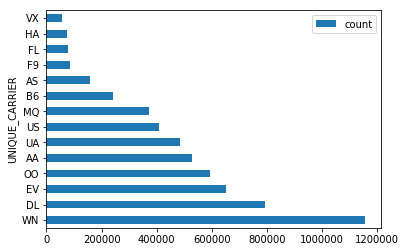

In [356]:
%matplotlib inline
plt.figure(figsize=(8,14))
carrier_flights.plot(kind = 'barh', x = 'UNIQUE_CARRIER')
plt.show()

[Text(0.5,0,'Number of flights')]

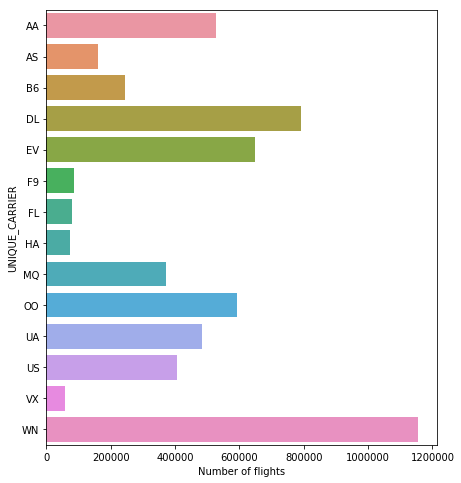

In [351]:
plt.figure(figsize=(7,8))
sns.barplot(y ='UNIQUE_CARRIER', x ='count', data = carrier_flights).set(xlabel = 'Number of flights')#, yticklabels = [])
#plt.annotate('Atlanta to New York Market', xy=(5,5), xytext=(5,5))
#plt.savefig('Top_Routes_marketID.png')

In [20]:
carrier_flights.merge(carrier_hist, how = 'left', left_on = 'UNIQUE_CARRIER', right_on = 'Code').to_csv('carrier_2.csv', index = False)

In [230]:
carrier_flights_2 = year_data_1.groupby('CARRIER').size().reset_index(name = 'count')\
.sort_values(by = 'count', ascending = False).reset_index(drop = True)
carrier_flights_2
carrier_flights_2.merge(carrier_hist, how = 'left', left_on = 'CARRIER', right_on = 'Code')

,CARRIER,count,Code,Description
0,WN,1156737,WN,Southwest Airlines Co. (1979 - )
1,DL,792500,DL,Delta Air Lines Inc. (1960 - )
2,EV,649765,EV,ExpressJet Airlines Inc. (2012 - )
3,EV,649765,EV,Atlantic Southeast Airlines (1993 - 2011)
4,OO,593074,OO,SkyWest Airlines Inc. (2003 - )
5,AA,527283,AA,American Airlines Inc. (1960 - )
6,UA,484992,UA,United Air Lines Inc. (1960 - )
7,US,407183,US,USAir (1988 - 1997)
8,US,407183,US,US Airways Inc. (1997 - 2015)
9,MQ,370524,MQ,Envoy Air (2014 - )


In [221]:
carrier_hist.sample(10)

,Code,Description
1234,PI,Piedmont Aviation Inc. (1960 - 1989)
73,2DQ,Aviation Partners of Boynton Beach LLC d/b/a H...
966,LAR,Laredo Air (1988 - 2002)
465,CCO,Chester County Aviation (1987 - 2002)
341,ATS,Atlantis Airlines Inc. (1960 - 2002)
1479,SST,Seaplane Shuttle Transport (1960 - 2002)
953,KXQ,Cayman Airways Limited (1981 - 1990)
550,CTR,Chartair (1988 - 2002)
1108,ND,Intair (1981 - 1991)
791,HA,Hawaiian Airlines Inc. (1960 - )


### Considering flights that have flown though diverted and arrival time is null

In [239]:
print((year_data['ARR_TIME'].notna() & year_data['CANCELLED'] == 1.0).values.sum())
print((year_data['ARR_TIME'].isnull() & year_data['DEP_TIME'].notnull()).values.sum())

0
6886


In [241]:
#year_data_2 = year_data[not_cancelled & dep_time_not_null]
del year_data_2

In [242]:
carrier_flights_2 = year_data[not_cancelled & dep_time_not_null].groupby('UNIQUE_CARRIER').size().reset_index(name = 'count')\
.sort_values(by = 'count', ascending = False).reset_index(drop = True)
carrier_flights_2.head()

,UNIQUE_CARRIER,count
0,WN,1159468
1,DL,793873
2,EV,651893
3,OO,594722
4,AA,529240


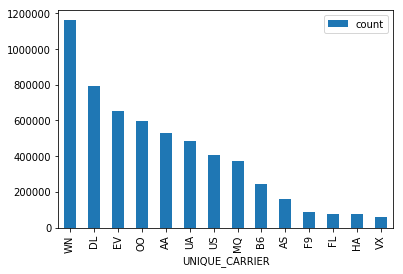

In [244]:
carrier_flights_2.plot(kind = 'bar', x = 'UNIQUE_CARRIER')

In [563]:
year_data_1.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1135,1144.0,9.0,9.0,0.0,0.0,1100-1159,12.0,1156.0,1253.0,9.0,1300,1302.0,2.0,2.0,0.0,0.0,1300-1359,0.0,0.0,85.0,78.0,57.0,1.0,328.0,2
1,2014-01-01,AA,19805,AA,N3FXAA,2378,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,2225,2220.0,-5.0,0.0,0.0,-1.0,2200-2259,14.0,2234.0,2311.0,4.0,2325,2315.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,0.0,60.0,55.0,37.0,1.0,204.0,1
3,2014-01-01,EV,20366,EV,N903EV,2502,11146,1114603,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1655,1805.0,70.0,70.0,1.0,4.0,1600-1659,6.0,1811.0,1941.0,24.0,1900,2005.0,65.0,65.0,1.0,4.0,1900-1959,0.0,0.0,185.0,180.0,150.0,1.0,946.0,4
4,2014-01-01,EV,20366,EV,N903EV,2502,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11146,1114603,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,1320,1440.0,80.0,80.0,1.0,5.0,1300-1359,9.0,1449.0,1730.0,5.0,1625,1735.0,70.0,70.0,1.0,4.0,1600-1659,0.0,0.0,125.0,115.0,101.0,1.0,946.0,4
5,2014-01-01,EV,20366,EV,N876AS,2503,10279,1027903,30279,AMA,"Amarillo, TX",TX,48,Texas,74,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1925,1909.0,-16.0,0.0,0.0,-2.0,1900-1959,8.0,1917.0,2000.0,53.0,2030,2053.0,23.0,23.0,1.0,1.0,2000-2059,0.0,0.0,65.0,104.0,43.0,1.0,312.0,2


## What airports are top 10 in delays?
### Considering number of times flights have been delayed
### *considering dep_delay and arr_delay separately*

In [ ]:
#checks
#year_data[year_data['ARR_TIME'].isna() & year_data['ARR_TIME'].isna()].count()

 #### Not considering cancelled, dep_time is null, arr time can be null

In [374]:
year_data_dep_delay = year_data[not_cancelled & dep_time_not_null][['ORIGIN_AIRPORT_ID', 'ORIGIN','DEP_DELAY','DEP_DELAY_NEW']]

In [375]:
year_data_dep_delay.shape

(5692827, 4)

In [376]:
#del year_data_dep_delay

In [377]:
#run data checks to make sure data is clean b/w dep_delay and dep_delay_new
((year_data_dep_delay['DEP_DELAY'] < 0.0 ) & (year_data_dep_delay['DEP_DELAY_NEW'] > 0.0)).sum()

0

In [389]:
delayed_flights = year_data_dep_delay[year_data_dep_delay['DEP_DELAY'] > 0.0]
delayed_flights.shape

(2319283, 4)

In [423]:
#year_data_1.shape
year_data_1[year_data_1['ORIGIN']=='ATL'].shape

(363021, 50)

#### Considering all delays

In [407]:
airport_all_delays_1 =delayed_flights.groupby(['ORIGIN','ORIGIN_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'DEP_DELAY', ascending = False).reset_index(drop = True)[:10]
airport_all_delays_1

,ORIGIN,ORIGIN_AIRPORT_ID,DEP_DELAY,DEP_DELAY_NEW
0,ATL,10397,151033.0,151033.0
1,ORD,13930,139295.0,139295.0
2,DFW,11298,121940.0,121940.0
3,DEN,11292,113851.0,113851.0
4,LAX,12892,93165.0,93165.0
5,IAH,12266,77479.0,77479.0
6,SFO,14771,71280.0,71280.0
7,PHX,14107,69156.0,69156.0
8,LAS,12889,64859.0,64859.0
9,MDW,13232,53796.0,53796.0


In [400]:
airport_all_delays = delayed_flights.groupby(['ORIGIN','ORIGIN_AIRPORT_ID']).\
size().reset_index(name = 'Count').\
sort_values('Count', ascending = False).reset_index(drop = True)[:10]
airport_all_delays

,ORIGIN,ORIGIN_AIRPORT_ID,Count
0,ATL,10397,151033
1,ORD,13930,139295
2,DFW,11298,121940
3,DEN,11292,113851
4,LAX,12892,93165
5,IAH,12266,77479
6,SFO,14771,71280
7,PHX,14107,69156
8,LAS,12889,64859
9,MDW,13232,53796


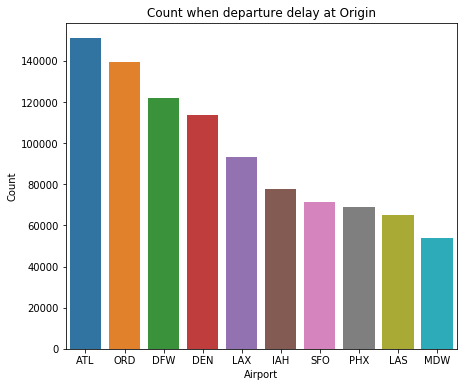

In [472]:
airport_all_delays_1['ORIGIN'] = airport_all_delays_1['ORIGIN'].astype('str')
plt.figure(figsize=(7,6))
sns.barplot(x ='ORIGIN', y ='DEP_DELAY', data = airport_all_delays_1).set(ylabel = 'Count', title = 'Count when departure delay at Origin',
                                                                         xlabel = "Airport")
plt.savefig('Times delay in departure.png')

#### Considering only dep delays > 15 mins.

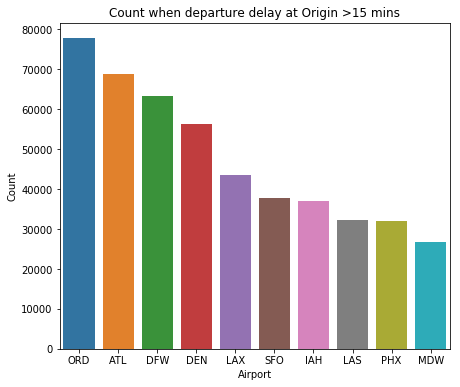

In [471]:
plt.figure(figsize=(7,6))
airport_15_delay= year_data_dep_delay[year_data_dep_delay['DEP_DELAY'] > 15.0]\
.groupby(['ORIGIN','ORIGIN_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'DEP_DELAY', ascending = False)[:10]
airport_15_delay['ORIGIN'] = airport_15_delay['ORIGIN'].astype('str')
sns.barplot(x ='ORIGIN', y ='DEP_DELAY', data = airport_15_delay).set(ylabel = 'Count', title = 'Count when departure delay at Origin >15 mins', 
                                                                     xlabel = 'Airport')
plt.savefig('Times delay in departure greater than 15 mins.png')

Text(0,0.5,'Count Dep Delays >15 mins')

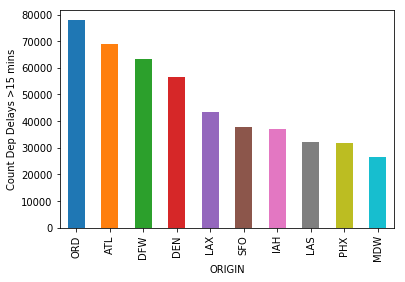

In [313]:
year_data_dep_delay[year_data_dep_delay['DEP_DELAY'] > 15.0]\
.groupby(['ORIGIN','ORIGIN_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'DEP_DELAY', ascending = False)[:10]\
.plot(kind = 'bar',x = 'ORIGIN', y = 'DEP_DELAY', legend = False).set_ylabel("Count Dep Delays >15 mins")

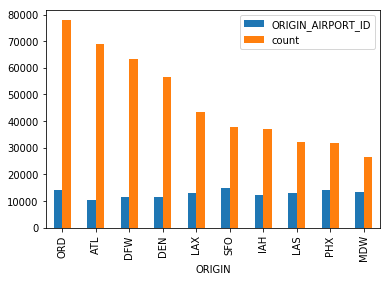

In [309]:
# year_data_dep_delay[year_data_dep_delay['DEP_DELAY'] > 15.0]\
# .groupby(['ORIGIN','ORIGIN_AIRPORT_ID'], as_index = False)\
# .size().reset_index(name = 'count').\
# sort_values('count', ascending = False).reset_index(drop = True)[:10]\
# .plot(kind = 'bar', x = 'ORIGIN')

#### considering only arrival delay and no diverted flight

In [428]:
year_data_arr_delay = year_data[not_cancelled & dep_time_not_null & arr_time_not_null & not_diverted]\
[['DEST_AIRPORT_ID', 'DEST','ARR_DELAY']]

In [612]:
delayed_flights = year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]
delayed_flights.shape

(2385731, 3)

Text(0,0.5,'Number of time Arr Delays')

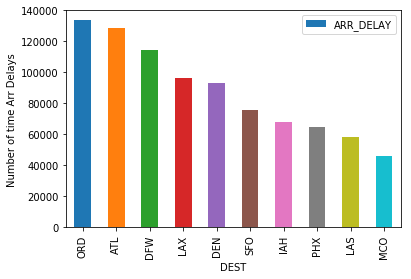

In [314]:
#any arrival delay
year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]\
.groupby(['DEST','DEST_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]\
.plot(kind = 'bar', x = 'DEST', y = 'ARR_DELAY').set_ylabel("Number of time Arr Delays")

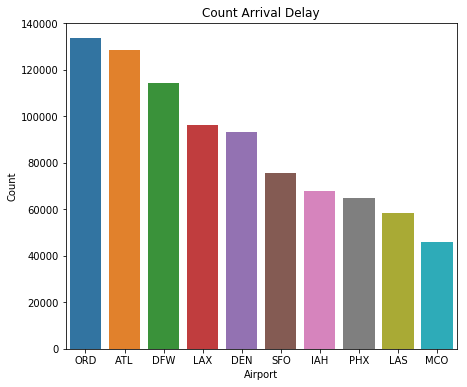

In [438]:
plt.figure(figsize=(7,6))
airport_arr_delay= year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]\
.groupby(['DEST','DEST_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]
airport_arr_delay['DEST'] = airport_arr_delay['DEST'].astype('str')
sns.barplot(x ='DEST', y ='ARR_DELAY', data = airport_arr_delay)\
.set(ylabel = 'Count', title = 'Count Arrival Delay', xlabel = 'Airport')
plt.savefig('Times delay in arrival.png')

Text(0,0.5,'Number of time Arr Delays >15 mins')

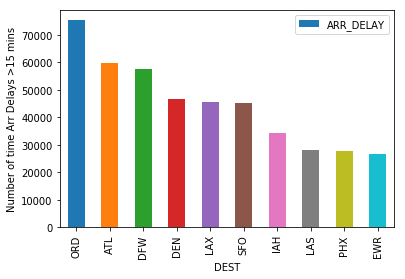

In [315]:
#number of arrival delay greater than 15 mins
year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 15.0]\
.groupby(['DEST'], as_index = False).count()\
.sort_values(by = 'ARR_DELAY', ascending = False).reset_index(drop = True)[:10]\
.plot(kind = 'bar', x = 'DEST', y = 'ARR_DELAY').set_ylabel("Number of time Arr Delays >15 mins")

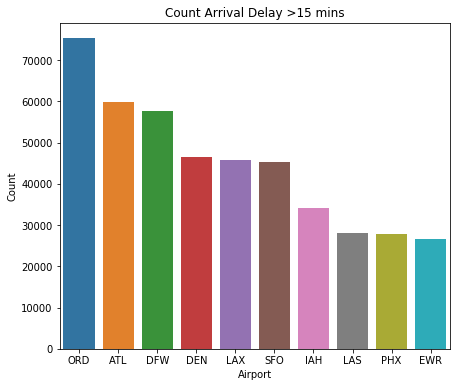

In [436]:
plt.figure(figsize=(7,6))
airport_arr_delay_15= year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 15.0]\
.groupby(['DEST','DEST_AIRPORT_ID'], as_index = False).count()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]
airport_arr_delay_15['DEST'] = airport_arr_delay_15['DEST'].astype('str')
sns.barplot(x ='DEST', y ='ARR_DELAY', data = airport_arr_delay_15)\
.set(ylabel = 'Count', title = 'Count Arrival Delay >15 mins', xlabel = 'Airport')
plt.savefig('Times delay in arrival greater thatn 15 mins.png')

In [474]:
airport_arr_delay_15

,DEST,DEST_AIRPORT_ID,ARR_DELAY
74520,ORD,13930,75311.0
6804,ATL,10397,59860.0
28512,DFW,11298,57616.0
28188,DEN,11292,46576.0
57348,LAX,12892,45673.0
90396,SFO,14771,45241.0
49572,IAH,12266,34201.0
56700,LAS,12889,28028.0
77760,PHX,14107,27746.0
34992,EWR,11618,26612.0


Text(0,0.5,'Total mins of delay')

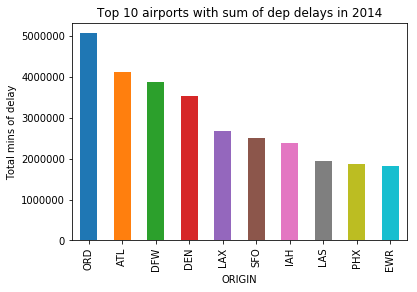

In [320]:
#by Total sum of dep delays..
year_data_dep_delay[year_data_dep_delay['DEP_DELAY'] > 0.0]\
.groupby(['ORIGIN','ORIGIN_AIRPORT_ID'], as_index = False).sum()\
.sort_values(by = 'DEP_DELAY', ascending = False).reset_index(drop=True)[:10]\
.plot(kind = 'bar',x = 'ORIGIN', y = 'DEP_DELAY', legend = False, title = "Top 10 airports with sum of dep delays in 2014")\
.set_ylabel("Total mins of dep delay")

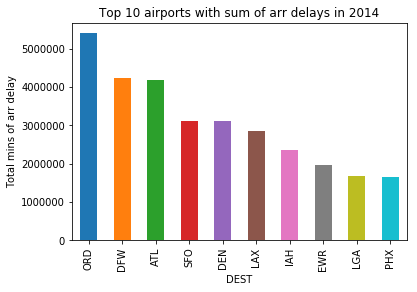

In [326]:
#by total sum of arrival delay
f =year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]\
.groupby(['DEST','DEST_AIRPORT_ID'], as_index = False).sum()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]\
.plot(kind = 'bar', x = 'DEST', y = 'ARR_DELAY', title = "Top 10 airports with sum of arr delays in 2014", legend = False)\
.set_ylabel("Total mins of arr delay").get_figure()
f.savefig('abc')

### Mean arrival delay

In [529]:
arr_delay_mean = year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0][['DEST','ARR_DELAY']]
print(arr_delay_mean.count())
print(arr_delay_mean.describe())
arr_delay_mean = arr_delay_mean[arr_delay_mean['ARR_DELAY'] <= 360]
print(arr_delay_mean.count())
print(arr_delay_mean.describe())
#airport_arr_delay_mean= year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]
arr_delay_mean = arr_delay_mean.groupby(['DEST'], as_index = False).mean()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]
arr_delay_mean['DEST'] = arr_delay_mean['DEST'].astype('str')
arr_delay_mean

DEST         2385731
ARR_DELAY    2385731
dtype: int64
          ARR_DELAY
count  2.385731e+06
mean   3.249031e+01
std    4.983857e+01
min    1.000000e+00
25%    6.000000e+00
50%    1.600000e+01
75%    3.800000e+01
max    2.444000e+03
DEST         2380520
ARR_DELAY    2380520
dtype: int64
          ARR_DELAY
count  2.380520e+06
mean   3.141912e+01
std    4.315265e+01
min    1.000000e+00
25%    6.000000e+00
50%    1.500000e+01
75%    3.800000e+01
max    3.600000e+02


,DEST,ARR_DELAY
242,PIB,54.000000
214,MQT,53.616882
118,FOE,50.707111
19,ART,49.815788
197,MEI,49.375000
276,SCE,48.611111
91,DLG,46.611111
30,BGR,45.568966
307,TTN,44.613129
58,CEC,44.437778


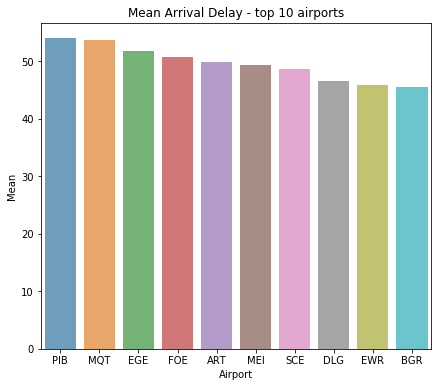

In [477]:
plt.figure(figsize=(7,6))
airport_arr_delay_mean= year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]\
.groupby(['DEST','DEST_AIRPORT_ID'], as_index = False).mean()\
.sort_values(by = 'ARR_DELAY', ascending = False)[:10]
airport_arr_delay_mean['DEST'] = airport_arr_delay_mean['DEST'].astype('str')
airport_arr_delay_mean
sns.barplot(x ='DEST', y ='ARR_DELAY', data = airport_arr_delay_mean, alpha = 0.7)\
.set(ylabel = 'Mean', title = 'Mean Arrival Delay - top 10 airports', xlabel = 'Airport')
plt.savefig('Mean delay- arrival.png')

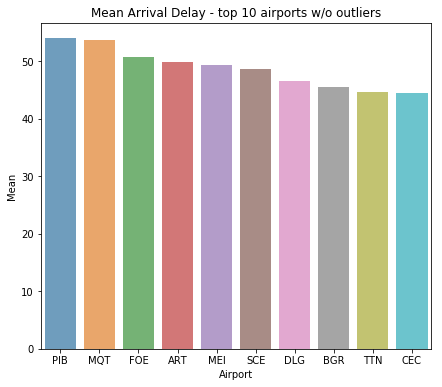

In [531]:
plt.figure(figsize=(7,6))
sns.barplot(x ='DEST', y ='ARR_DELAY', data = arr_delay_mean, alpha = 0.7)\
.set(ylabel = 'Mean', title = 'Mean Arrival Delay - top 10 airports w/o outliers', xlabel = 'Airport')
plt.savefig('Mean delay- arrival -removing outliers.png')

In [516]:
few_airports = year_data_arr_delay[year_data_arr_delay['DEST'].
                                   isin(['PIB', 'MQT','EGE','FOE','ART','MEI','SCE','DLG','EWR','BGR'])][['DEST','ARR_DELAY']]
print(few_airports.shape)
few_airports = few_airports[few_airports['ARR_DELAY'] > 0.0]
few_airports = few_airports['ARR_DELAY'] <300.0
print(few_airports.shape)
few_airports.groupby(['DEST'], as_index = False).size()
few_airports.describe()

(108600, 2)
(44531, 2)


,ARR_DELAY
count,44531.000000
mean,45.959354
std,59.732960
min,1.000000
25%,9.000000
50%,25.000000
75%,58.000000
max,1312.000000


In [499]:
print(year_data_arr_delay.shape)
arr_delay_pos = year_data_arr_delay[year_data_arr_delay['ARR_DELAY'] > 0.0]
arr_delay_pos[arr_delay_pos['ARR_DELAY'] <= 0.0]

(5678378, 3)


,DEST_AIRPORT_ID,DEST,ARR_DELAY


## What are the most popular day of the week to travel? Why? 

In [439]:
#calculating day of week and month from FL_Date
year_data['WEEK_DAY']= year_data['FL_DATE'].dt.weekday_name
year_data['MONTH'] = year_data['FL_DATE'].dt.month
year_data['WEEK_DAY_NUM'] = year_data['FL_DATE'].dt.dayofweek

In [448]:
day_travel_ally = year_data[['WEEK_DAY','WEEK_DAY_NUM']].groupby(['WEEK_DAY','WEEK_DAY_NUM']).size()\
.reset_index(name = 'Count')\
.sort_values('Count', ascending = False).reset_index(drop = True)

In [449]:
day_travel_ally['WEEK_DAY'] = day_travel_ally['WEEK_DAY'].astype('str')

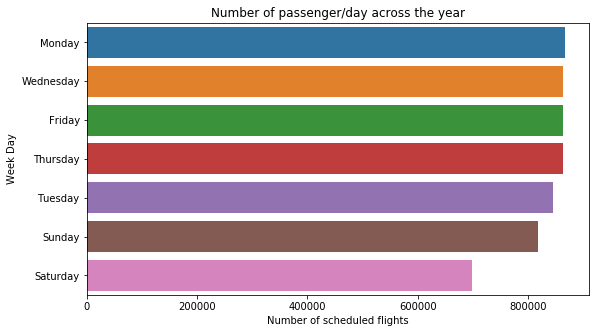

In [463]:
plt.figure(figsize = (9,5))
sns.barplot(y ='WEEK_DAY', x ='Count', data = day_travel_ally)\
.set(ylabel = 'Week Day', title = 'Number of passenger/day across the year', xlabel = 'Number of scheduled flights')
plt.savefig('Most popular day to Travel_yearly.png')

In [454]:
day_travel_month = year_data[['MONTH','WEEK_DAY','WEEK_DAY_NUM']].groupby(['MONTH','WEEK_DAY','WEEK_DAY_NUM']).size()\
.reset_index(name = 'Count').sort_values(['MONTH', 'WEEK_DAY_NUM'])
day_travel_month_sorted = day_travel_month.sort_values(['MONTH', 'Count'],ascending = [True,False])

In [455]:
day_travel_month_sorted

,MONTH,WEEK_DAY,WEEK_DAY_NUM,Count
0,1,Friday,4,80874
4,1,Thursday,3,80652
6,1,Wednesday,2,75608
1,1,Monday,0,64004
5,1,Tuesday,1,60412
3,1,Sunday,6,59535
2,1,Saturday,5,50864
7,2,Friday,4,65890
11,2,Thursday,3,65603
8,2,Monday,0,64921


In [456]:
day_travel_month.reset_index(drop = True)

,MONTH,WEEK_DAY,WEEK_DAY_NUM,Count
0,1,Monday,0,64004
1,1,Tuesday,1,60412
2,1,Wednesday,2,75608
3,1,Thursday,3,80652
4,1,Friday,4,80874
5,1,Saturday,5,50864
6,1,Sunday,6,59535
7,2,Monday,0,64921
8,2,Tuesday,1,62063
9,2,Wednesday,2,63297


In [457]:
day_travel_month[['MONTH', 'Count']].groupby('MONTH', as_index = False).sum().sort_values(by = 'Count',ascending = False)

,MONTH,Count
6,7,520880
7,8,507491
2,3,503758
5,6,502617
4,5,499278
9,10,491011
3,4,483499
11,12,477183
0,1,471949
8,9,469489


<Figure size 432x288 with 0 Axes>

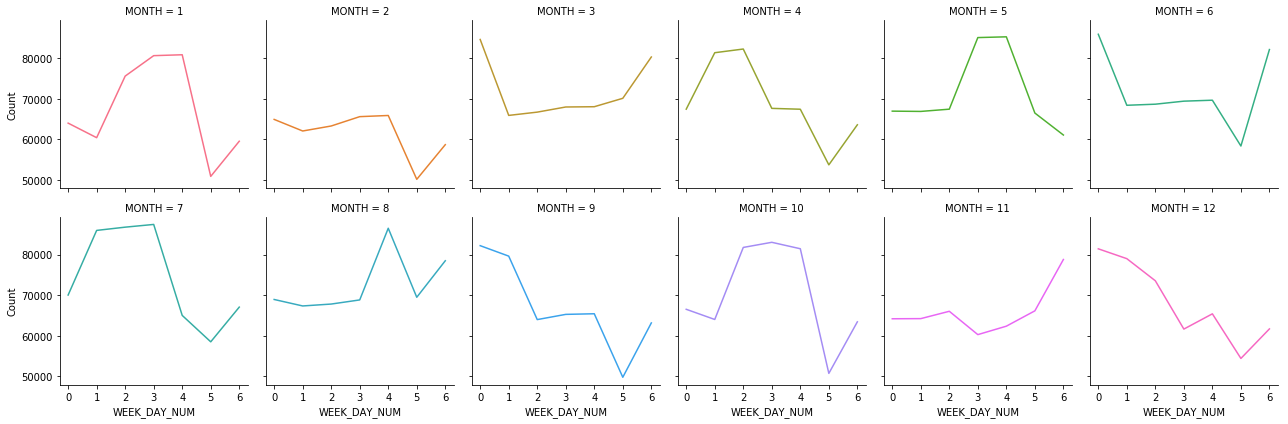

In [564]:
plt.figure() 
#f = day_travel.plot(subplots = True,x = 'WEEK_DAY', y = 'Count', figsize = (10,7))
g = sns.FacetGrid(day_travel_month,col = 'MONTH', hue= 'MONTH', col_wrap = 6)
g = g.map(plt.plot,'WEEK_DAY_NUM','Count').set(xticks=[0,1,2,3,4,5,6])
#,title = "Number of travels on weekday per Month"
plt.savefig('Week day travel across months_2')

In [463]:
year_data[['FL_DATE']].groupby('FL_DATE').size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = False)[:10]

,FL_DATE,Count
219,2014-08-08,17586
212,2014-08-01,17584
198,2014-07-18,17568
191,2014-07-11,17563
205,2014-07-25,17558
218,2014-08-07,17544
190,2014-07-10,17532
211,2014-07-31,17527
187,2014-07-07,17527
201,2014-07-21,17520


In [601]:
year_data[['FL_DATE']].groupby('FL_DATE').size().reset_index(name = 'Count').sort_values(by = 'Count', ascending = True)[:10]

,FL_DATE,Count
330,2014-11-27,10313
31,2014-02-01,11952
17,2014-01-18,12043
38,2014-02-08,12107
24,2014-01-25,12126
10,2014-01-11,12151
339,2014-12-06,12158
346,2014-12-13,12178
304,2014-11-01,12228
248,2014-09-06,12260


### Other  insights..

<Figure size 432x288 with 0 Axes>

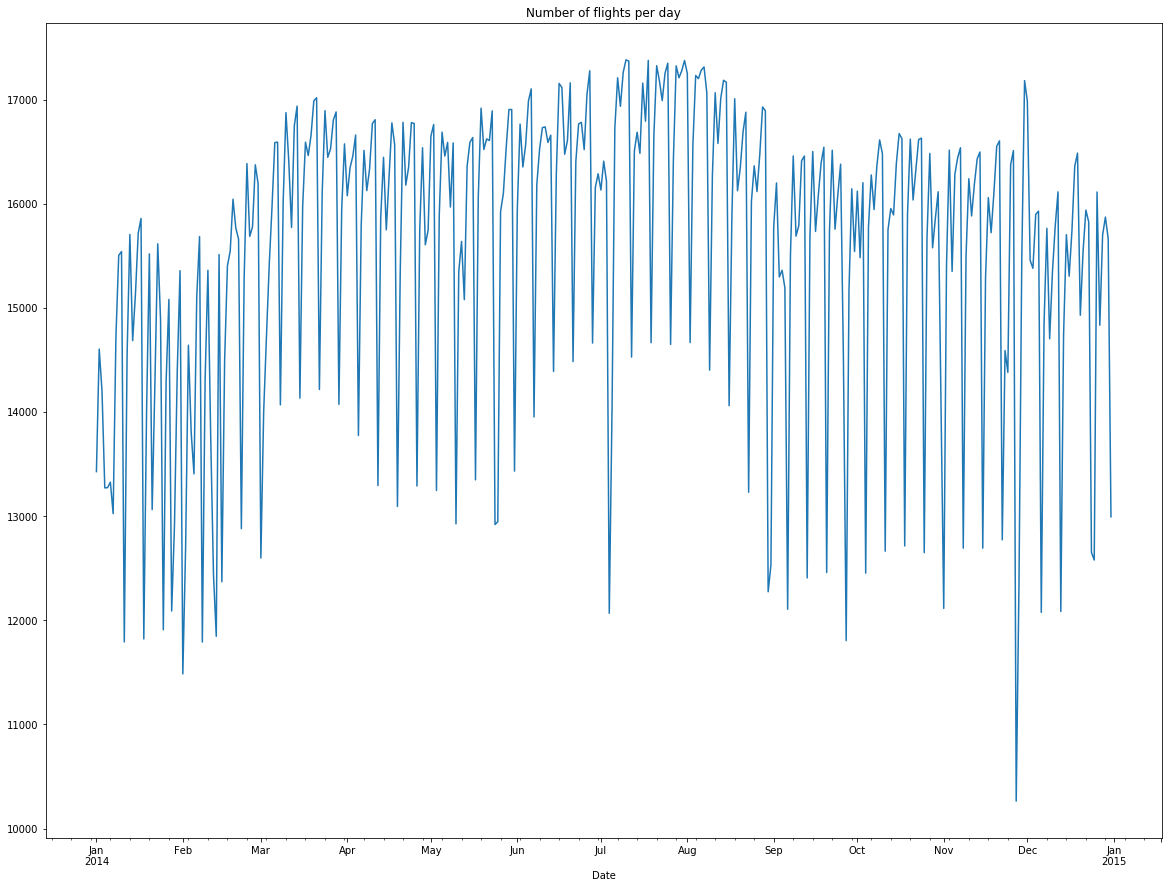

In [609]:
num_flights_day = year_data_1[['FL_DATE']].groupby('FL_DATE').size().reset_index(name = 'Count')
num_flights_day = num_flights_day.set_index('FL_DATE')
# X = num_flights_day[]
plt.figure()
num_flights_day.plot(figsize =(20,15),title = 'Number of flights per day', legend = False).set_xlabel('Date')
plt.savefig('Daily number of flights')
#plt.figure(figsize = (9,7))

In [579]:
num_flights_day.dtypes

FL_DATE    datetime64[ns]
Count               int64
dtype: object

In [599]:
year_data.tail()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,WEEK_DAY,MONTH,WEEK_DAY_NUM
5819806,2014-12-31,MQ,20398,MQ,N9EAMQ,3552,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22,640,635.0,-5.0,0.0,0.0,-1.0,0600-0659,37.0,712.0,811.0,5.0,820,816.0,-4.0,0.0,0.0,-1.0,0800-0859,0.0,0.0,100.0,101.0,59.0,1.0,431.0,2,Wednesday,12,2
5819807,2014-12-31,MQ,20398,MQ,N503MQ,3555,11066,1106603,31066,CMH,"Columbus, OH",OH,39,Ohio,44,13930,1393003,30977,ORD,"Chicago, IL",IL,17,Illinois,41,720,752.0,32.0,32.0,1.0,2.0,0700-0759,11.0,803.0,801.0,41.0,750,842.0,52.0,52.0,1.0,3.0,0700-0759,0.0,0.0,90.0,110.0,58.0,1.0,296.0,2,Wednesday,12,2
5819808,2014-12-31,MQ,20398,MQ,N821MQ,3564,11995,1199502,31995,GSO,"Greensboro/High Point, NC",NC,37,North Carolina,36,12953,1295302,31703,LGA,"New York, NY",NY,36,New York,22,1010,1007.0,-3.0,0.0,0.0,-1.0,1000-1059,8.0,1015.0,1119.0,4.0,1145,1123.0,-22.0,0.0,0.0,-2.0,1100-1159,0.0,0.0,95.0,76.0,64.0,1.0,461.0,2,Wednesday,12,2
5819809,2014-12-31,MQ,20398,MQ,N649MQ,3611,10868,1086803,30868,CAE,"Columbia, SC",SC,45,South Carolina,37,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,600,556.0,-4.0,0.0,0.0,-1.0,0600-0659,17.0,613.0,757.0,7.0,805,804.0,-1.0,0.0,0.0,-1.0,0800-0859,0.0,0.0,185.0,188.0,164.0,1.0,922.0,4,Wednesday,12,2
5819810,2014-12-31,MQ,20398,MQ,N852MQ,3612,11049,1104902,31049,CLL,"College Station/Bryan, TX",TX,48,Texas,74,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1120,1125.0,5.0,5.0,0.0,0.0,1100-1159,7.0,1132.0,1209.0,7.0,1215,1216.0,1.0,1.0,0.0,0.0,1200-1259,0.0,0.0,55.0,51.0,37.0,1.0,164.0,1,Wednesday,12,2


In [571]:
year_data_1

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP
0,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1135,1144.0,9.0,9.0,0.0,0.0,1100-1159,12.0,1156.0,1253.0,9.0,1300,1302.0,2.0,2.0,0.0,0.0,1300-1359,0.0,0.0,85.0,78.0,57.0,1.0,328.0,2
1,2014-01-01,AA,19805,AA,N3FXAA,2378,13303,1330303,32467,MIA,"Miami, FL",FL,12,Florida,33,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,2225,2220.0,-5.0,0.0,0.0,-1.0,2200-2259,14.0,2234.0,2311.0,4.0,2325,2315.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,0.0,60.0,55.0,37.0,1.0,204.0,1
3,2014-01-01,EV,20366,EV,N903EV,2502,11146,1114603,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1655,1805.0,70.0,70.0,1.0,4.0,1600-1659,6.0,1811.0,1941.0,24.0,1900,2005.0,65.0,65.0,1.0,4.0,1900-1959,0.0,0.0,185.0,180.0,150.0,1.0,946.0,4
4,2014-01-01,EV,20366,EV,N903EV,2502,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11146,1114603,31146,CRW,"Charleston/Dunbar, WV",WV,54,West Virginia,39,1320,1440.0,80.0,80.0,1.0,5.0,1300-1359,9.0,1449.0,1730.0,5.0,1625,1735.0,70.0,70.0,1.0,4.0,1600-1659,0.0,0.0,125.0,115.0,101.0,1.0,946.0,4
5,2014-01-01,EV,20366,EV,N876AS,2503,10279,1027903,30279,AMA,"Amarillo, TX",TX,48,Texas,74,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1925,1909.0,-16.0,0.0,0.0,-2.0,1900-1959,8.0,1917.0,2000.0,53.0,2030,2053.0,23.0,23.0,1.0,1.0,2000-2059,0.0,0.0,65.0,104.0,43.0,1.0,312.0,2
6,2014-01-01,EV,20366,EV,N876AS,2503,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10279,1027903,30279,AMA,"Amarillo, TX",TX,48,Texas,74,1740,1740.0,0.0,0.0,0.0,0.0,1700-1759,14.0,1754.0,1848.0,5.0,1850,1853.0,3.0,3.0,0.0,0.0,1800-1859,0.0,0.0,70.0,73.0,54.0,1.0,312.0,2
7,2014-01-01,EV,20366,EV,N876AS,2504,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,14814,1481402,30476,SHV,"Shreveport, LA",LA,22,Louisiana,72,2040,2124.0,44.0,44.0,1.0,2.0,2000-2059,18.0,2142.0,2212.0,6.0,2130,2218.0,48.0,48.0,1.0,3.0,2100-2159,0.0,0.0,50.0,54.0,30.0,1.0,190.0,1
8,2014-01-01,EV,20366,EV,N902EV,2505,10279,1027903,30279,AMA,"Amarillo, TX",TX,48,Texas,74,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1705,1733.0,28.0,28.0,1.0,1.0,1700-1759,9.0,1742.0,1824.0,16.0,1810,1840.0,30.0,30.0,1.0,2.0,1800-1859,0.0,0.0,65.0,67.0,42.0,1.0,312.0,2
9,2014-01-01,EV,20366,EV,N902EV,2505,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10279,1027903,30279,AMA,"Amarillo, TX",TX,48,Texas,74,1520,1557.0,37.0,37.0,1.0,2.0,1500-1559,16.0,1613.0,1705.0,4.0,1630,1709.0,39.0,39.0,1.0,2.0,1600-1659,0.0,0.0,70.0,72.0,52.0,1.0,312.0,2
10,2014-01-01,EV,20366,EV,N902EV,2506,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,10781,1078102,30781,BTR,"Baton Rouge, LA",LA,22,Louisiana,72,1910,1913.0,3.0,3.0,0.0,0.0,1900-1959,14.0,1927.0,2021.0,7.0,2025,2028.0,3.0,3.0,0.0,0.0,2000-2059,0.0,0.0,75.0,75.0,54.0,1.0,383.0,2


In [269]:
import sys; sorted([(x, sys.getsizeof(x)) for x in dir()], key=lambda x: x[1], reverse=True)

[('origin_airports_seqid', 70),
 ('dest_airports_seqid', 68),
 ('arr_time_not_null', 66),
 ('carrier_flights_2', 66),
 ('dep_time_not_null', 66),
 ('route_airport_id', 65),
 ('airportID_seqid', 64),
 ('carrier_flights', 64),
 ('delayed_flights', 64),
 ('route_market_id', 64),
 ('airport_seq_id', 63),
 ('airports_seqid', 63),
 ('route_marketid', 63),
 ('airport_seqid', 62),
 ('arr_time_null', 62),
 ('city_marketid', 62),
 ('dep_time_null', 62),
 ('monthly_files', 62),
 ('not_cancelled', 62),
 ('__builtins__', 61),
 ('carrier_hist', 61),
 ('not_diverted', 61),
 ('origin_seqid', 61),
 ('__builtin__', 60),
 ('__package__', 60),
 ('get_ipython', 60),
 ('__loader__', 59),
 ('_exit_code', 59),
 ('dest_seqid', 59),
 ('cancelled', 58),
 ('route_seq', 58),
 ('year_data', 58),
 ('__name__', 57),
 ('__spec__', 57),
 ('airports', 57),
 ('diverted', 57),
 ('my_order', 57),
 ('__doc__', 56),
 ('_i100', 54),
 ('_i101', 54),
 ('_i102', 54),
 ('_i103', 54),
 ('_i104', 54),
 ('_i105', 54),
 ('_i106', 54)